# Lab 4.02


Cleaning categorical data
For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data.

Instructions
Import the necessary libraries if you are starting a new notebook. Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [69]:
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [70]:
data.columns = list(map(lambda x: x.lower().replace(' ','_'), data.columns))

In [71]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


Find all of the categorical data. Save it in a categorical_df variable.

In [72]:
categorical_df = data.select_dtypes(include =[object])
categorical_df = categorical_df.drop(['customer'], axis=1)
categorical_df.head()

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


Check for NaN values.

In [73]:
categorical_df.isna().sum()

state                0
response             0
coverage             0
education            0
effective_to_date    0
employmentstatus     0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

Check all unique values of columns.

In [74]:
categorical_df.apply(pd.Series.unique)

state                [Washington, Arizona, Nevada, California, Oregon]
response                                                     [No, Yes]
coverage                                    [Basic, Extended, Premium]
education            [Bachelor, College, Master, High School or Bel...
effective_to_date    [2/24/11, 1/31/11, 2/19/11, 1/20/11, 2/3/11, 1...
employmentstatus     [Employed, Unemployed, Medical Leave, Disabled...
gender                                                          [F, M]
location_code                                 [Suburban, Rural, Urban]
marital_status                             [Married, Single, Divorced]
policy_type              [Corporate Auto, Personal Auto, Special Auto]
policy               [Corporate L3, Personal L3, Corporate L2, Pers...
renew_offer_type                      [Offer1, Offer3, Offer2, Offer4]
sales_channel                        [Agent, Call Center, Web, Branch]
vehicle_class        [Two-Door Car, Four-Door Car, SUV, Luxury SUV,...
vehicl

In [75]:
display(categorical_df['state'].value_counts(dropna=False))
display(categorical_df['employmentstatus'].value_counts(dropna=False))
display(categorical_df['vehicle_class'].value_counts(dropna=False))
display(categorical_df['vehicle_size'].value_counts(dropna=False)) 

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

Check dtypes. Do they all make sense as categorical data?

In [76]:
categorical_df.dtypes

state                object
response             object
coverage             object
education            object
effective_to_date    object
employmentstatus     object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object

In [77]:
categorical_df['effective_to_date'] = pd.to_datetime(categorical_df['effective_to_date'], errors='coerce')

In [78]:
categorical_df.dtypes

state                        object
response                     object
coverage                     object
education                    object
effective_to_date    datetime64[ns]
employmentstatus             object
gender                       object
location_code                object
marital_status               object
policy_type                  object
policy                       object
renew_offer_type             object
sales_channel                object
vehicle_class                object
vehicle_size                 object
dtype: object

Does any column contain alpha and numeric data? Decide how to clean it.
#Renew Offer Type could be just  numeric in this case.	

In [79]:
display(categorical_df['sales_channel'].value_counts(dropna=False)) #Could simply be considered as so for encoding later.

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

In [80]:
display(categorical_df['renew_offer_type'].value_counts(dropna=False)) #Could simply be shown as numbers

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

In [81]:
def cleanoperation(x):
    
    if  (x == "Offer1"):
        return "1"
    elif (x == "Offer2"):
        return "2"
    elif (x == "Offer3"):
        return "3"
    else:
        return 4

In [82]:
categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].apply(cleanoperation)

In [83]:
categorical_df['renew_offer_type']

0       1
1       3
2       1
3       1
4       1
       ..
9129    2
9130    1
9131    1
9132    3
9133    4
Name: renew_offer_type, Length: 9134, dtype: object

Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

In [84]:
display(categorical_df['employmentstatus'].value_counts(dropna=False))

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [85]:
def cleanOperation(x):
    
    if  (x == "Medical Leave"):
        return "Employed"
    elif ((x == "Disabled") | (x == "Retired")):
        return "Unemployed"
    else:
        return x

# Those who are retired are probably no longer working, although they may choose to do so, but earn a retirement.  
# Disability shouldn't, of course, be a synonym of unemployment, but this answer instead of "Employed" may be an indication.
# Those in Medical Leave are, indeed, employed, or wouldn't fit this label.

In [86]:
categorical_df['employmentstatus'] = categorical_df['employmentstatus'].apply(cleanOperation)

In [87]:
display(categorical_df['education'].value_counts(dropna=False))

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [88]:
categorical_df['education'] = np.where(categorical_df['education'].isin(['Master','Doctor']) , 'Postgraduate', categorical_df['education'])
categorical_df['education'] = np.where(categorical_df['education'].isin(['College','Bachelor']) , 'Undergraduate', categorical_df['education'])

Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

In [89]:
categorical_df['employmentstatus'] = list(map(cleanOperation, categorical_df['employmentstatus']))

In [58]:
categorical_df.head()

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Undergraduate,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,4,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Undergraduate,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,4,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Undergraduate,2011-02-19,Employed,F,Suburban,Married,Personal Auto,4,Agent,Two-Door Car,Medsize
3,California,No,Basic,Undergraduate,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,4,Call Center,Top of Line Cars,Medsize
4,Washington,No,Basic,Undergraduate,2011-02-03,Employed,M,Rural,Single,Personal Auto,4,Agent,Four-Door Car,Medsize


In [67]:
display(categorical_df['policy'].value_counts(dropna=False)) 
display(categorical_df['policy_type'].value_counts(dropna=False))
# Just a name for policy_type. L1, L2 and L3 for each category sum up to the different categories in policy_type. 
#Can be dropped, for policy doesn't add any new info, it's best to have it categorized in three types.
categorical_df = categorical_df.drop(['policy'], axis=1)

KeyError: 'policy'

Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [60]:

categorical_df['vehicle_class'] = np.where(categorical_df['vehicle_class'].isin(['SUV', 'Luxury SUV', 'Luxury Car']) , 'Top of Line Cars', categorical_df['vehicle_class'])
#SUV and luxury are top of line cars, so they could go with luxury cars in general.
categorical_df['vehicle_class'] = np.where(categorical_df['vehicle_class'].isin(['Sports Car']) , 'Two-Door Car', categorical_df['vehicle_class'])
#Sports Cars are usually small, two-door cars.

In [61]:
display(categorical_df['vehicle_class'].value_counts(dropna=False))

Four-Door Car       4621
Two-Door Car        2370
Top of Line Cars    2143
Name: vehicle_class, dtype: int64

In [62]:
categorical_df.nunique()

state                 5
response              2
coverage              3
education             3
effective_to_date    59
employmentstatus      2
gender                2
location_code         3
marital_status        3
policy_type           3
renew_offer_type      1
sales_channel         4
vehicle_class         3
vehicle_size          3
dtype: int64

# Lab 4.03 

Instructions
Open the categoricals variable we created before.

In [63]:
categoricals = data.select_dtypes(np.object)
categoricals.head()

C:\Users\franc\AppData\Local\Temp/ipykernel_1808/1940378060.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = data.select_dtypes(np.object)


,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


Plot all the categorical variables with the proper plot. What can you see?

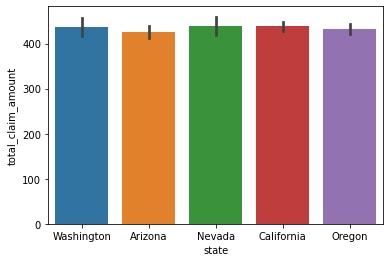

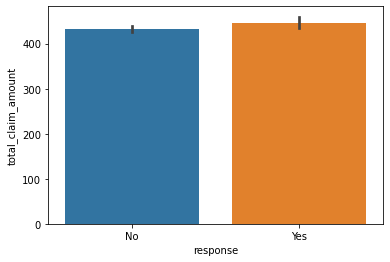

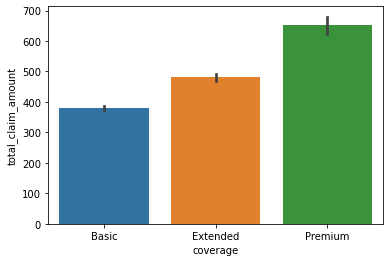

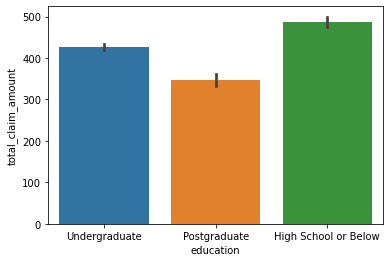

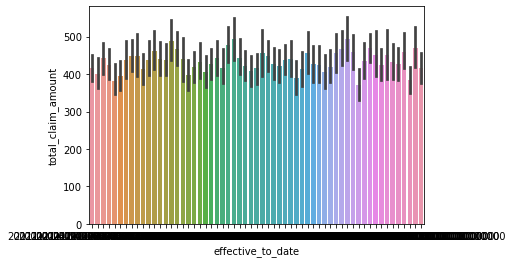

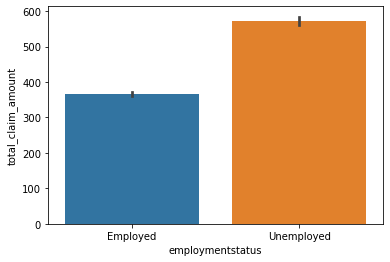

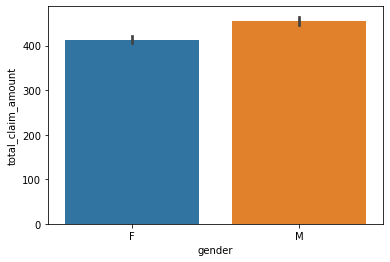

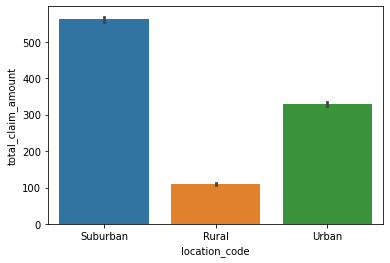

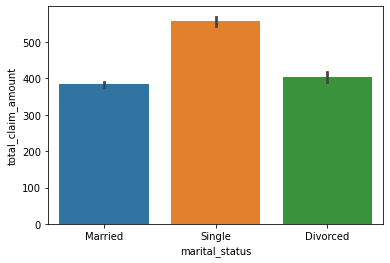

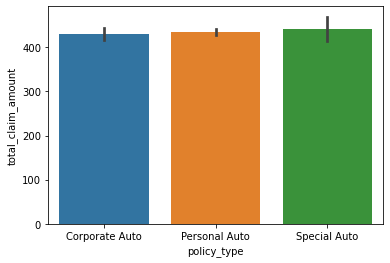

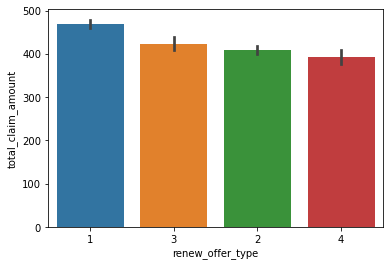

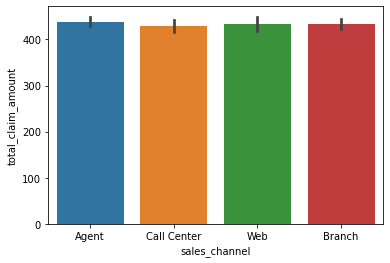

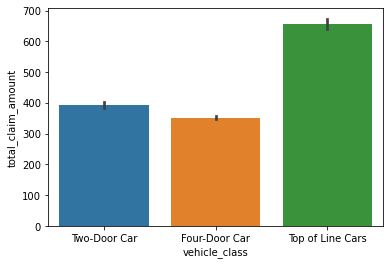

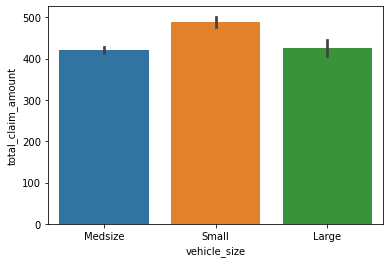

In [30]:
for column in categorical_df.columns:
    sns.barplot(x=column, y=data['total_claim_amount'], data=categorical_df)
    plt.show()

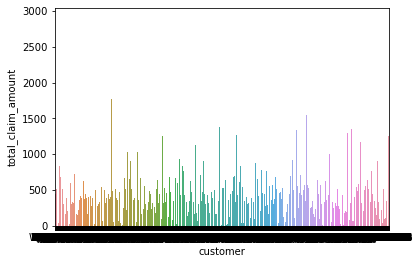

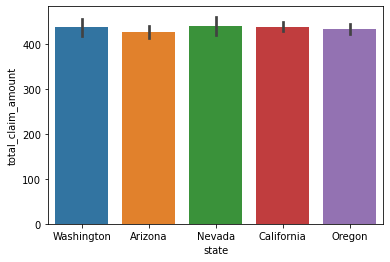

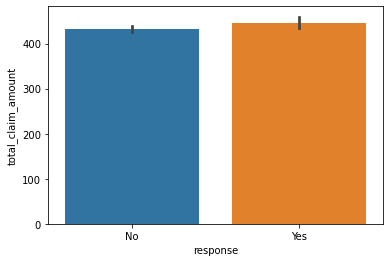

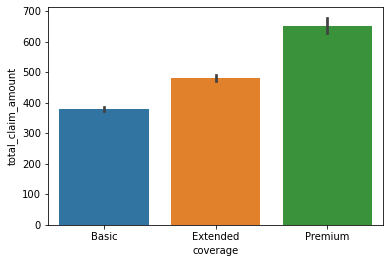

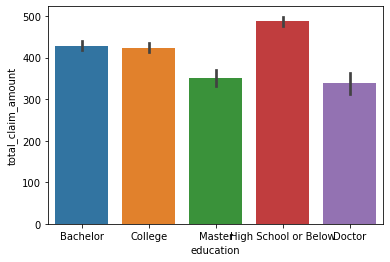

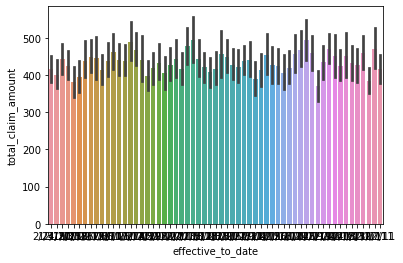

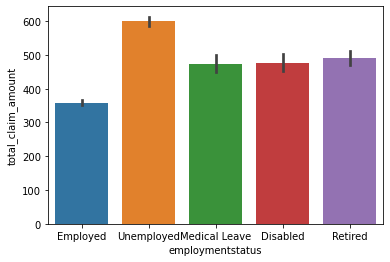

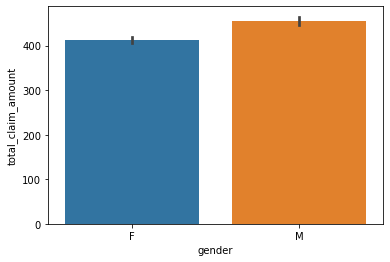

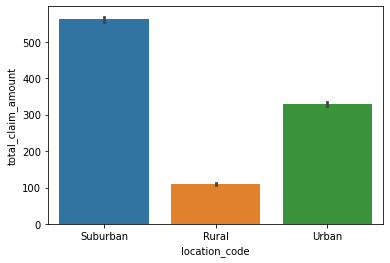

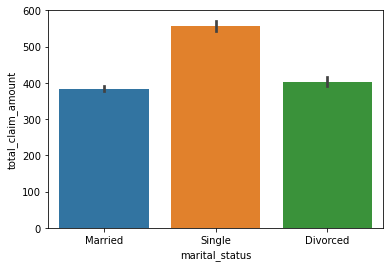

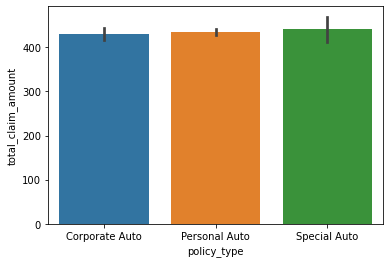

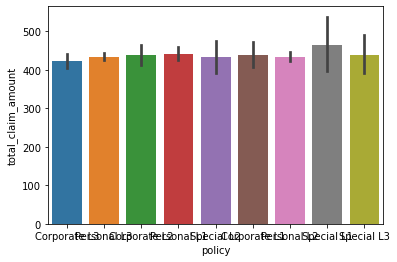

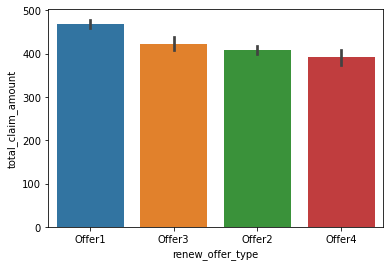

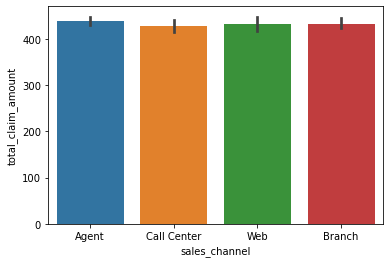

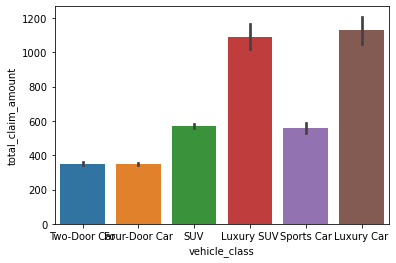

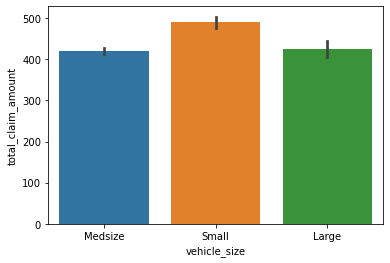

In [64]:
for column in categoricals.columns:
    sns.barplot(x=column, y=data['total_claim_amount'], data=categoricals)
    plt.show()

There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
#For the original data, policy and policy type look redundant.

Plot time variable. Can you extract something from it?

In [65]:
categoricals['effective_to_date'] = pd.to_datetime(categoricals['effective_to_date']).dt.month

C:\Users\franc\AppData\Local\Temp/ipykernel_1808/1708881714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals['effective_to_date'] = pd.to_datetime(categoricals['effective_to_date']).dt.month


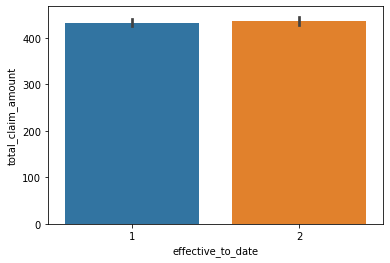

In [66]:
sns.barplot(x='effective_to_date', y=data['total_claim_amount'], data=categoricals)
plt.show()